# **Part 1: Setup**

Hello! Welcome to our Google Colab notebook for our machine learning project, ***Binary Classification of Water-immersed and Oil-immersed Electrodes Across Neural Network Models***. Let's get started! 😀🐄

## Getting our Dataset

This project's dataset is uploaded on one of the author's [Github Repository](https://github.com/aritako/binary-signal-classification/blob/main/dataset.csv). That way, we can run the `wget` shell command for remote access of our dataset. This eliminates the need for mounting the dataset to Google Drive, which may cause some complications when working in a collaborative environment.

In [ ]:
!wget -q https://raw.githubusercontent.com/aritako/binary-signal-classification/main/dataset.csv

## Importing Initial Dependencies
Then, we import our initial dependencies for this project—`pandas` and `numpy`. We'll be importing more dependencies along the way as we continue on with this project.

In [ ]:
import pandas as pd
import numpy as np

## Quick Check

Let's check if we have successfully retrieved our dataset.

In [ ]:
df = pd.read_csv('dataset.csv', delimiter = ";")
df.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,target
0,38.29,38.29,38.29,38.29,38.29,38.29,38.66,38.66,38.66,38.66,1
1,39.03,38.66,39.03,39.03,39.03,39.03,39.03,39.03,39.03,39.03,1
2,39.41,39.41,39.41,39.41,39.41,39.41,39.78,39.41,39.78,39.78,1
3,39.78,39.78,39.78,39.78,40.15,40.15,40.15,40.15,40.15,40.15,1
4,40.52,40.52,40.52,40.52,40.52,40.52,40.52,40.52,40.52,40.52,1


# **Part 2: Exploratory Data Analysis**

Before training our model, let us first investigate our dataset so that we can gain some insight with the data we'll be working with.

## Understanding the Structure of the Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    4475 non-null   float64
 1   col2    4475 non-null   float64
 2   col3    4475 non-null   float64
 3   col4    4475 non-null   float64
 4   col5    4475 non-null   float64
 5   col6    4475 non-null   float64
 6   col7    4475 non-null   float64
 7   col8    4475 non-null   float64
 8   col9    4475 non-null   float64
 9   col10   4475 non-null   float64
 10  target  4475 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 384.7 KB


In [ ]:
df.describe()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,target
count,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000
mean,40.242163,40.241703,40.243537,40.246246,40.254878,40.258060,40.256577,40.258404,40.269526,40.268711,0.148156
std,35.429036,35.429118,35.427647,35.427066,35.422751,35.422279,35.422088,35.423766,35.418881,35.420502,0.989074
min,1.130000,1.130000,1.130000,1.130000,1.130000,1.130000,1.130000,1.130000,1.130000,1.130000,-1.000000
25%,2.070000,2.070000,2.070000,2.070000,2.070000,2.070000,2.070000,2.070000,2.070000,2.070000,-1.000000
50%,35.060000,35.060000,35.060000,35.060000,35.060000,35.060000,35.060000,35.070000,35.060000,35.230000,1.000000
75%,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,1.000000
max,85.190000,85.190000,85.190000,85.190000,85.190000,85.190000,85.190000,85.190000,85.190000,85.190000,1.000000


So far, we can observe that we have **4475 rows and 11 columns.** The range of values we'll be working with per column is within the range of [1.13, 85.19], with the mean being around 40.

Let's try and find out how many electrode signals are made in water (represented by 1) or oil (represented by -1).





In [ ]:
df['target'].value_counts()

target
 1    2569
-1    1906
Name: count, dtype: int64

We have **2569 signals** and **1906 signals** for water-immersed and oil-immersed electrodes, respectively.

Next, we check for any null or missing values.

In [ ]:
df.isnull().sum()

col1      0
col2      0
col3      0
col4      0
col5      0
col6      0
col7      0
col8      0
col9      0
col10     0
target    0
dtype: int64

Nice! We do not need to perform any imputations since there are no null values.

## Visualizing the Dataset
To gain further insight about our data, we can use `seaborn` and `matplotlib` to visualize the dataset through graphs.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Let's try and use **Histograms** to plot each feature. The X-axis corresponds to the feature values of the `nth`-column, while the Y-axis corresponds to the count occurrence.


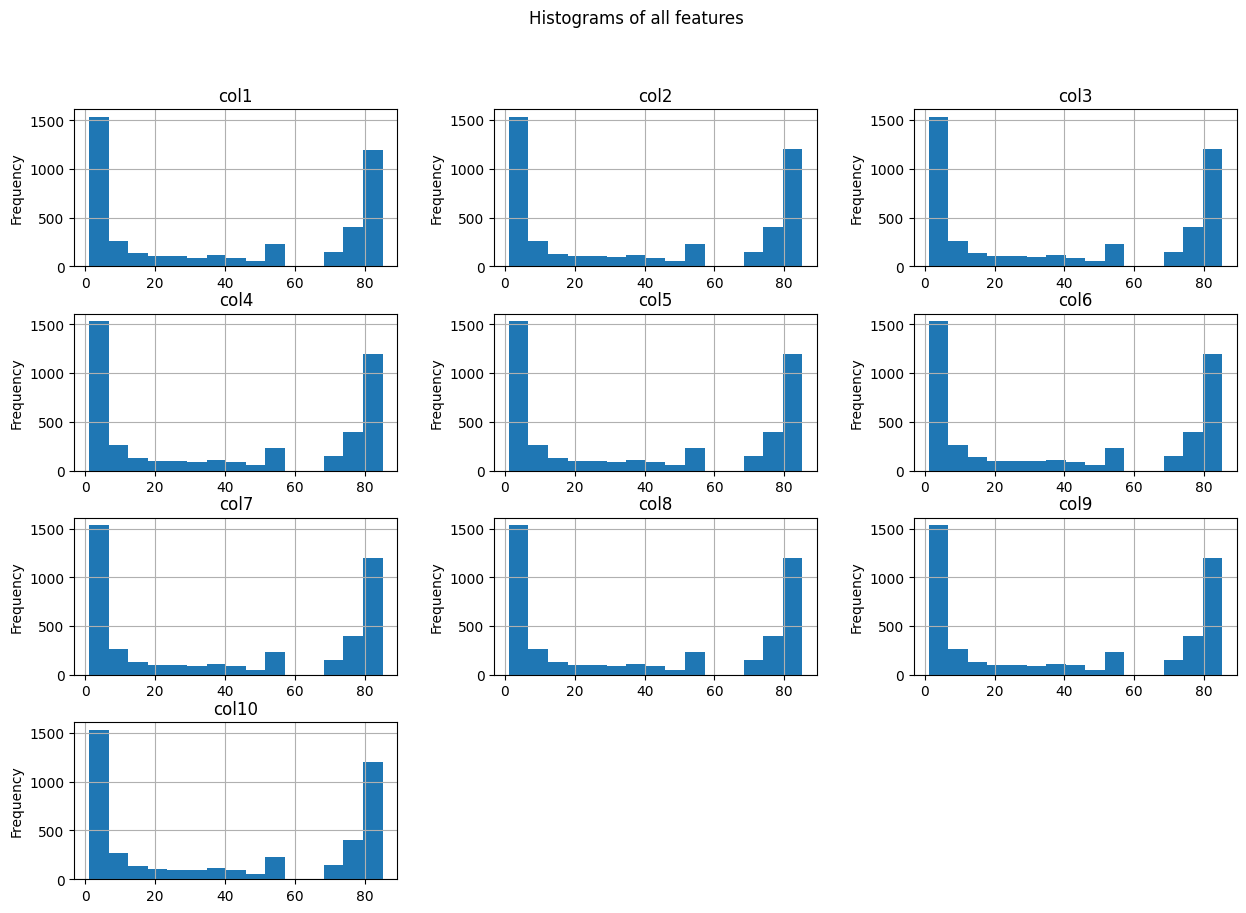

In [ ]:
df.iloc[:, :-1].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of all features')
for ax in plt.gcf().axes:
    ax.set_ylabel('Frequency')
plt.show()

We already checked the count values of our target column. Let's try visualizing the distribution of our classes.

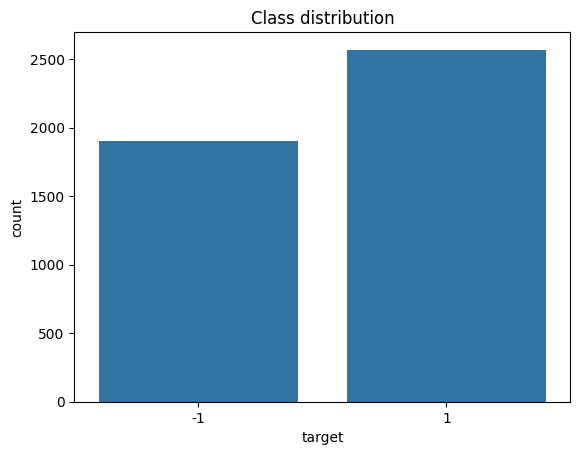

In [ ]:
df['target'].value_counts()
sns.countplot(x='target', data=df)
plt.title('Class distribution')
plt.show()

Finally, let's use a **Correlation Matrix** to understand the relationships between our variables.

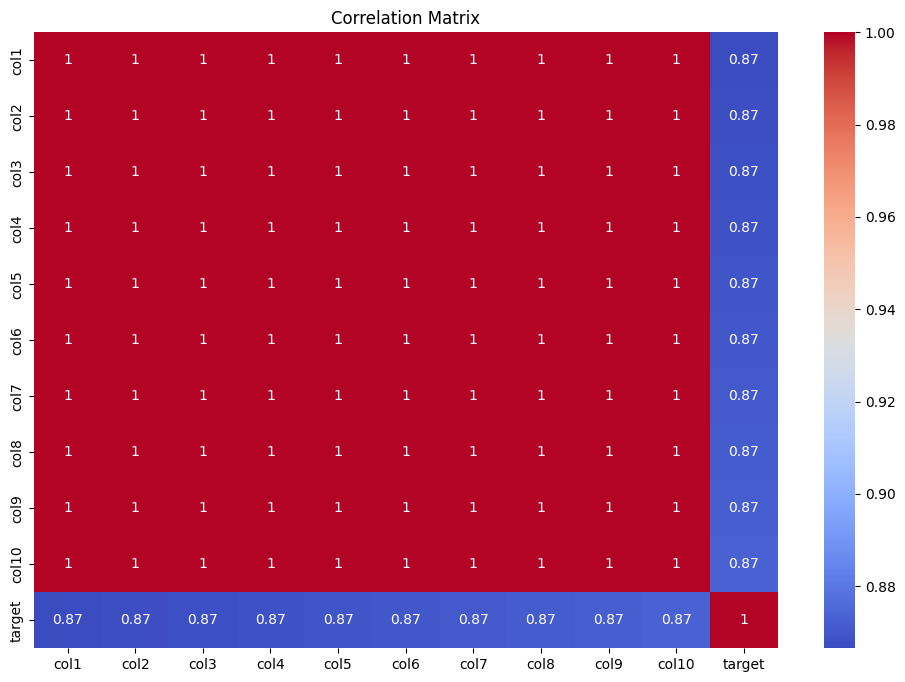

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

We have a very interesting output! This correlation matrix indicates a perfect correlation (correlation coefficient of 1) among all feature columns (col1 to col10), suggesting that they have identical or highly similar values. The target column also shows a high correlation (0.87) with the feature columns, indicating a strong relationship between the features and the target variable.


---


From our exploratory data analysis, we can conclude that our data is already in good shape, and we don't need any further preprocessing of data! Let's proceed with setting up our datasets for training our models.


# **Part 3: Preparing our Train and Test Dataset**

Let's begin by importing the necessary libraries for splitting our data—`sklearn`.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Let's separate our dataset between the features and the target, i.e. `X` and `y`.

In [ ]:
X = df.drop("target", axis = 1)
y = df["target"]

With that, we can conveniently split our dataset usign the the `sklearn` method, `train_test_split`. We allocate 80% of our data for training, and 20% for testing.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)

print("Train Set Count:", len(X_train))
print("Test Set Count:", len(X_test))

Train Set Count: 3580
Test Set Count: 895
